<a href="https://colab.research.google.com/github/alifele/Bioinformatics-and-Fourier-Optics/blob/master/Sinc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
from scipy import signal
from scipy import misc

In [3]:
window_size = 10

In [87]:
x  = np.linspace(-10,10,100*window_size)
x_sample = np.linspace(-10,10,window_size)

In [88]:
X,Y = np.meshgrid(x,x)
X_s, Y_s = np.meshgrid(x_sample,x_sample)

In [89]:
def sinc(X,Y, etha):
  return np.sin(etha*(X**2 + Y**2 + 0.00001)**0.5)/(etha*(X**2+Y**2 + 0.00001)**0.5)
  #return np.sin(X + 0.0001)/(X+ 0.0001) + np.sin(Y + 0.0001)/(Y+ 0.0001)

In [90]:
result = sinc(X,Y,0.01)

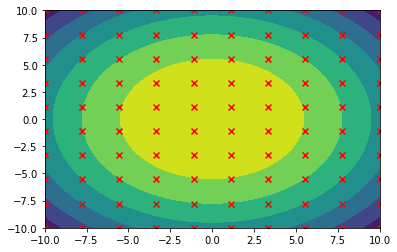

In [91]:
plt.contourf(X,Y,result)
plt.scatter(X_s,Y_s, marker='x', c='r')

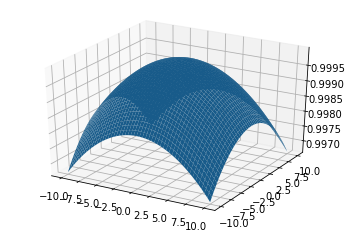

In [94]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, result)


In [95]:
x_samp = np.linspace(0,100*window_size-1,window_size,dtype=int)
x_samp

array([  0, 111, 222, 333, 444, 555, 666, 777, 888, 999])

In [96]:
X_samp, Y_samp = np.meshgrid(x_samp, x_samp)

In [97]:
weights = result[x_samp][:,x_samp]
weights = weights / np.sum(weights)

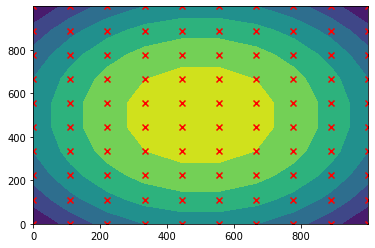

In [98]:
plt.contourf(X_samp, Y_samp, weights)
plt.scatter(X_samp,Y_samp, marker='x', c='r')

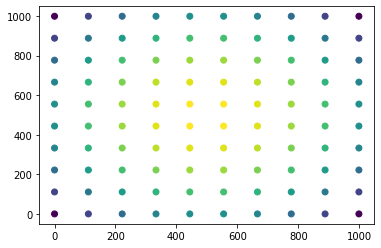

In [99]:
#plt.contourf(X_samp, Y_samp, weights)
plt.scatter(X_samp, Y_samp, c=weights)

# Test on imagese

In [47]:
def get_weights(window_size, etha):
  x  = np.linspace(-10,10,500*window_size)
  X,Y = np.meshgrid(x,x)
  result = sinc(X,Y,etha)
  x_samp = np.linspace(0,500*window_size-1,window_size,dtype=int)
  X_samp, Y_samp = np.meshgrid(x_samp, x_samp)
  weights = result[x_samp][:,x_samp]
  #weights = weights / np.sum(weights)
  return X_samp, Y_samp,weights

In [48]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [49]:
from sklearn.datasets import load_sample_image

In [50]:
flower = load_sample_image("flower.jpg") / 255
flower =  rgb2gray(flower)
flower.shape

(427, 640)

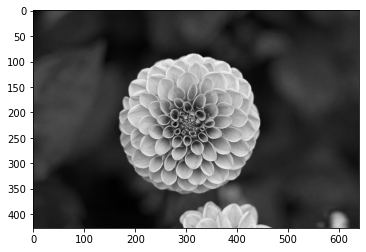

In [51]:
plt.imshow(flower, cmap='gray')

## Regular Average Pooling with different window size

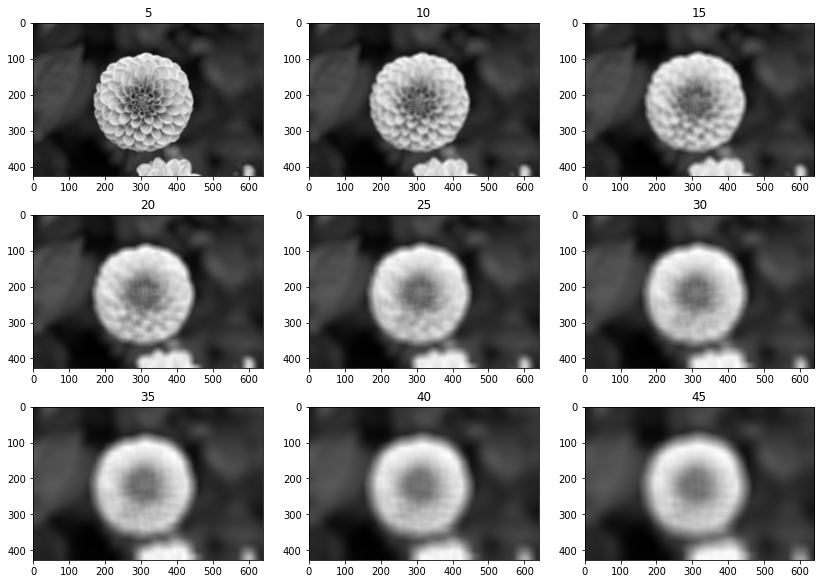

In [65]:
a_mat = np.array([[5,10,15],[20,25,30],[35,40,45]])   # different window sizes
#filet_aver = np.ones((a,a))/a**2
#grad = signal.convolve2d(flower, filet_aver, boundary='symm', mode='same')
#plt.imshow(grad, cmap='gray')
fig, ax = plt.subplots(3,3, figsize=(14,10))

for i in range(3):
  for j in range(3):
    a = a_mat[i,j]
    filet_aver = np.ones((a,a))/a**2
    grad = signal.convolve2d(flower, filet_aver, boundary='symm', mode='same')
    ax[i,j].imshow(grad, cmap='gray')
    ax[i,j].set_title(a)


## Optical Average Pooling with 30 window size but different amount of sinc curveture (Look at the contour plots)

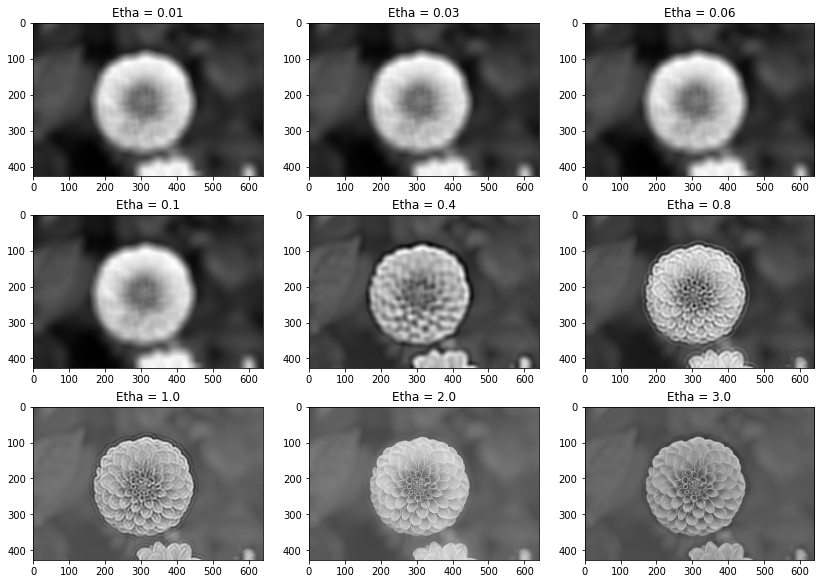

In [77]:
a_mat = np.array([[0.01,0.03,0.06],[0.1,0.4,0.8],[1,2,3]])
fig, ax = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
  for j in range(3):
    a = a_mat[i,j]
    X_samp, Y_samp, weights = get_weights(30,a)
    grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')
    ax[i,j].imshow(grad, cmap='gray')
    ax[i,j].set_title("Etha = {}".format(a) )

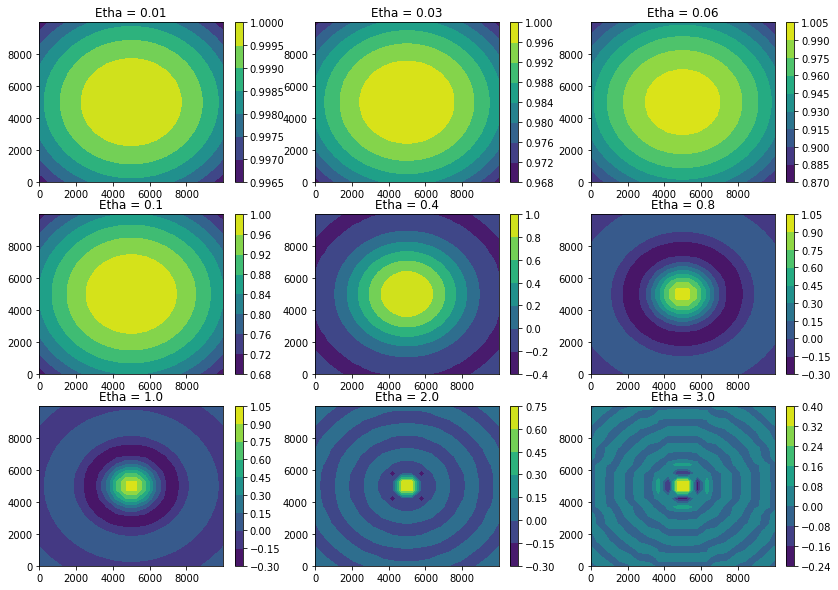

In [78]:
a_mat = np.array([[0.01,0.03,0.06],[0.1,0.4,0.8],[1,2,3]])
fig, ax = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
  for j in range(3):
    a = a_mat[i,j]
    X_samp, Y_samp, weights = get_weights(20,a)
    im = ax[i,j].contourf(X_samp, Y_samp, weights)
    ax[i,j].set_title("Etha = {}".format(a) )
    plt.colorbar(im, ax = ax[i,j])

So far that best result (The best optical average pooling that resembles the electrical one) is the sinc function with etha = 0.01 and window size = 30

## Optical Average Pooling single test

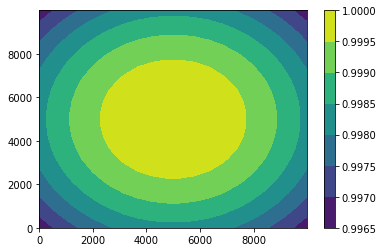

In [58]:
plt.contourf(X_samp, Y_samp, weights)
plt.colorbar()

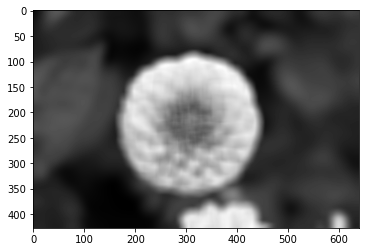

In [57]:
X_samp, Y_samp, weights = get_weights(20,0.01)
grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')